<a href="https://colab.research.google.com/github/AnirudhJM24/MarketSegmentation/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
messages = pd.read_csv('/content/SMSSpamCollection.txt', sep='\t',
                           names=["label", "message"])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords

In [7]:
import re

In [13]:
corpus = []
for i in range (0,len(messages)):
  text = re.sub('[^a-z A-Z]',' ',messages['message'][i])
  text = text.lower()
  text = text.split()
  text = [word for word in text if not word in stopwords.words('english')]
  corpus.append(text)

In [16]:
corpus[:4]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']]

In [21]:
corpus1 = np.asarray(corpus)

In [25]:
for i in corpus1:
  i = np.asarray(i)

In [29]:
corpus1 = [' '.join(words) for words in corpus1]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus1).toarray()
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)



In [35]:
y_pred=spam_detect_model.predict(X_test)

In [36]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

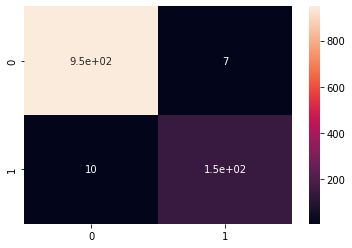

In [41]:
import seaborn as sn
sn.heatmap(cm,annot = True)